# Graph Isomorphism Problem


The question of whether graph isomorphism can be determined in polynomial time is a major unsolved problem in computer science, known as the Graph Isomorphism problem.[1]

Graph Isomorphism Problem is a computational problem in graph theory, where the goal is to determine whether two given graphs are isomorphic, this is, they have the same structure.

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import itertools
import numpy as np


### NetworkX and is_isomorphic()

Here I will read graphs from a file and check if they are isomorphic I will use a libaray called NetworkX.
 
NetworkX (nx) is a popular Python library for working with graphs, including testing for graph isomorphism. nx provides a function called is_isomorphic() that takes two nx graphs as input and returns True if they are isomorphic, and False otherwise. 

In [58]:
#reading data from sample graph
with open('data/samplegraph.csv', 'r') as File:
    graph = list(csv.reader(File, delimiter=','))


In [59]:
with open('data/samplegraph2.csv', 'r') as File2:
    graph1 = list(csv.reader(File2, delimiter=','))


In [60]:
with open('data/samplegraph3.csv', 'r') as File2:
    graph2 = list(csv.reader(File2, delimiter=','))


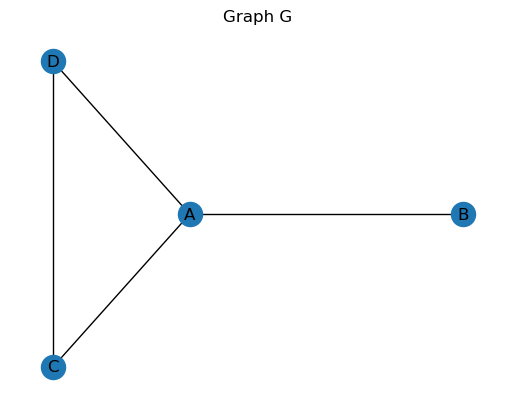

In [61]:
G=nx.Graph()

G.add_edges_from(graph)
plt.title("Graph G")
nx.draw_spectral(G, with_labels=True)
#nx.draw(G)

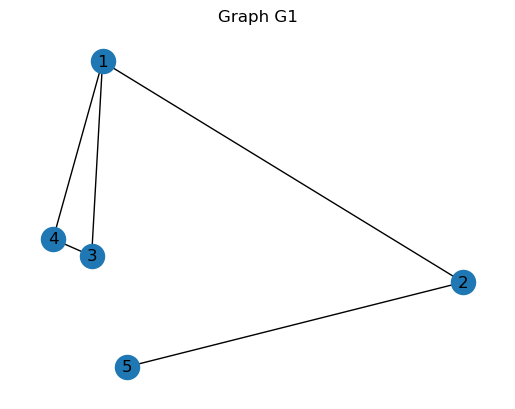

In [64]:
G1 = nx.Graph()

G1.add_edges_from(graph1)
plt.title("Graph G1")
nx.draw_random(G1, with_labels=True)
#nx.draw(G1)

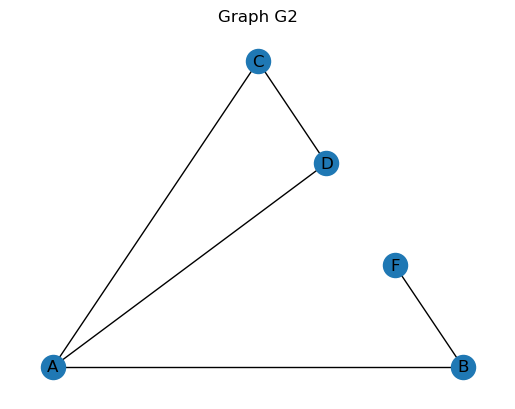

In [65]:
G2 = nx.Graph()

G2.add_edges_from(graph2)
plt.title("Graph G2")
nx.draw_planar(G2, with_labels=True)
#nx.draw(G2)


In [66]:
nx.is_isomorphic(G, G2)


False

These graphs have different numbers of edges and vertices, and no bijection between them. Therefore, G and G2 are not isomorphic.

In [67]:
nx.is_isomorphic(G1, G2)


True

Two graphs are isomorphic if they have the same "structure", but their vertices may have different labels. I have shown this is Graph G1 and graph G2. The answer is true that they are isomorphic. 

In the next part I will repersent graph in two different ways one by an edge-list and two by a adjacency matrix

##### Edge-list graph
You can add from a edge list which is a list of tuples and these tuples repersent edges, 
you can use the list to create a graph

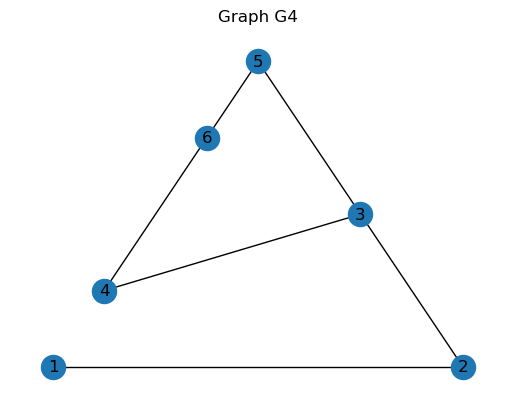

In [82]:

edge_list =[(1,2),(2,3),(3,4),(3,5), (5,6),(4,6)]
G4 = nx.Graph()
G4.add_edges_from(edge_list)
plt.title("Graph G4")
nx.draw_planar(G4, with_labels=True)


##### Adjacency matrix Graph 
Another way to repersent a graph is a adjacency matrix.
Each row and column in the matrix represents a vertex in the graph, 
and the entries in the matrix indicate whether there is an edge connecting the corresponding vertices.

In [3]:


G5 = nx.from_numpy_array(np.array([[0, 1, 0, 0, 0, 0],
                                  [1, 0, 1, 0, 0, 0],
                                  [0, 1, 0, 1, 1, 0],
                                  [0, 0, 1, 0, 0, 1],
                                  [0, 0, 1, 0, 0, 1],
                                  [0, 0, 0, 1, 1, 0]
                              ]))


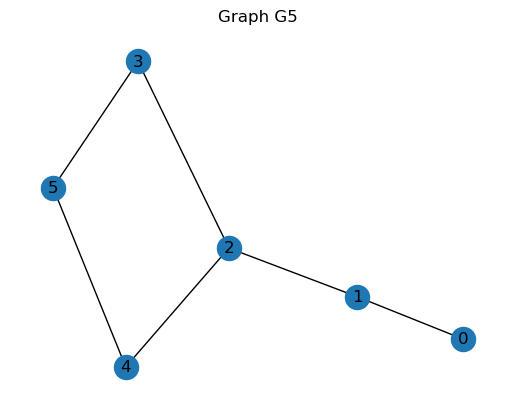

In [79]:
plt.title("Graph G5")
nx.draw_spring(G5, with_labels=True)



Graph G5 represented by a adjacency matrix and G4 represented by an edge-list, checking are they isomorphic. 
the answer is true, they are isomorphic 

In [80]:
#checking are they isomorphic
nx.is_isomorphic(G5, G4)


True

The is_isomorphic() function in NetworkX uses a variety of algorithms to efficiently test for graph isomorphism. The exact algorithm used depends on the size and properties of the input graphs. One of the algorithms used by nx is the VF2 algorithm.

## Permutations

In [212]:
# Define the adjacency matrix
adj_matrix = np.array([[0, 1, 0, 0, 1],
                       [1, 0, 1, 0, 0],
                       [0, 1, 0, 1, 0],
                       [0, 0, 1, 0, 1],
                       [1, 0, 0, 1, 0]])

# Create the graph from the adjacency matrix
G1P = nx.from_numpy_array(adj_matrix)


In [213]:
# Generate all possible permutations of the node labels
perms = itertools.permutations(range(len(G1P.nodes())))

# a list to store the permuted graphs
permuted_graphs = [] 
permuted_adj_matrix_graph = []


# Iterate over each permutation and permute the adjacency matrix
with open("data/permuted_adj_matrices.txt", "w") as f:
    for perm in perms:
        permuted_adj_matrix = adj_matrix[np.ix_(list(perm), list(perm))]
        permuted_G5 = nx.from_numpy_array(permuted_adj_matrix)

    # writing to file    
        f.write(str(permuted_adj_matrix) + "\n")
        permuted_graphs.append(permuted_G5)
        permuted_adj_matrix_graph.append(permuted_adj_matrix)





In [214]:
# printing one permuted_adj_matrix for example
# extract graph 7(random number) from the list and print its matrix
G_7P = permuted_graphs[7]
print(G_7P)
G_7P_matrix = permuted_adj_matrix_graph[7]
print(G_7P_matrix)


Graph with 5 nodes and 5 edges
[[0 0 1 1 0]
 [0 0 1 0 1]
 [1 1 0 0 0]
 [1 0 0 0 1]
 [0 1 0 1 0]]


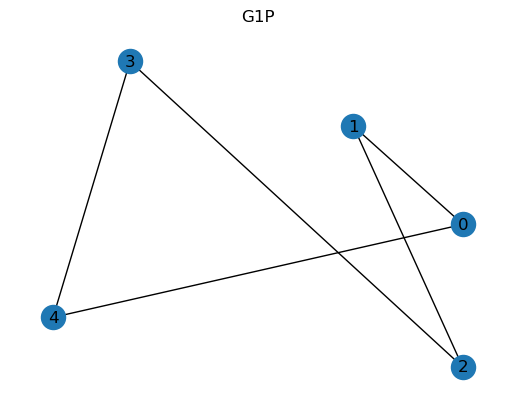

In [221]:
plt.title("G1P")
nx.draw_random(G1P, with_labels=True)



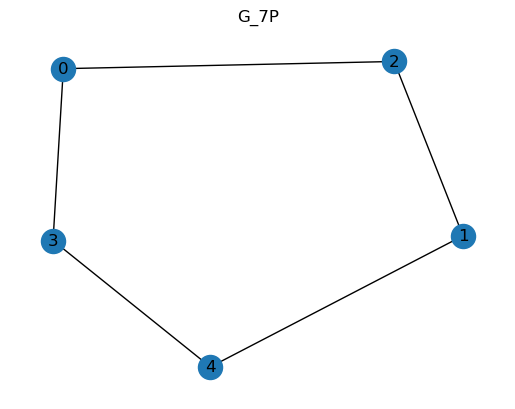

In [218]:
plt.title("G_7P")
nx.draw_spring(G_7P, with_labels=True)


In [219]:
# checking are they isomorphic
nx.is_isomorphic(G1P, G_7P)


True

Here you can see the permutation of the graph is isomorphic. 
- G1P is isomorphic to G_7P

The next part I will take all permutations of the matrix and print to a file if they are isomorphic or not

In [250]:
adj_matrix = np.array([[0, 1, 0, 0, 1],
                       [1, 0, 1, 0, 0],
                       [0, 1, 0, 1, 0],
                       [0, 0, 1, 0, 1],
                       [1, 0, 0, 1, 0]])


In [251]:
G5 = nx.from_numpy_array(adj_matrix)
perms = itertools.permutations(range(len(G5.nodes())))


In [252]:
# a list to store the permuted graphs
permuted_graphs = []


In [253]:
# another adj-matrix that has 5 node but is not isomorphic 
adj_matrix2 = np.array([[0, 1, 1, 0, 0],
                       [1, 0, 0, 1, 0],
                       [1, 0, 0, 1, 0],
                       [0, 1, 1, 0, 1],
                       [0, 0, 0, 1, 0]])

G7 = nx.from_numpy_array(adj_matrix2)


In [254]:
# iterating over each permutation and permute the adjacency matrix
for perm in perms:
    permuted_adj_matrix = adj_matrix[np.ix_(list(perm), list(perm))]
    permuted_G5 = nx.from_numpy_array(permuted_adj_matrix)
    permuted_graphs.append(permuted_G5)
  



Here I will write all the permuted graphs and see if they are isomorphic in a file 
The is_isomorphic function is checking if they are isomorphic

In [255]:
print(len(permuted_graphs))

# search for isomorphic graphs
with open("data/isomorphic_graphs.txt", "w") as f:
    for i in range(len(permuted_graphs)):
        g1 = permuted_graphs[i]
        for g2 in permuted_graphs[i+1:]:
            if nx.is_isomorphic(g1, g2):
                 f.write(f"Graph {i} and graph {permuted_graphs.index(g2)} are isomorphic.\n")
            else:
                f.write(f"Graph {i} and graph {permuted_graphs.index(g2)} are Not Isomorphic.\n")

120


In [256]:
permuted_graphs.append(G7)
print(len(permuted_graphs))


121


Here I add a none isomorphic graph(G7) to the end of the list, I will write it to the file and compare 

In [259]:
with open("data/isomorphic_graphs2.txt", "w") as f:
    for i in range(len(permuted_graphs)):
        g1 = permuted_graphs[i]
        for g2 in permuted_graphs[i+1:]:
            if nx.is_isomorphic(g1, g2):
                f.write(f"Graph {i} and graph {permuted_graphs.index(g2)} are isomorphic.\n")
            else:
                f.write(f"Graph {i} and graph {permuted_graphs.index(g2)} are Not Isomorphic.\n")


As you can see in the file "data/isomorphic_graphs2.txt" the last graph I appended on are not Isomorphic to the rest.  

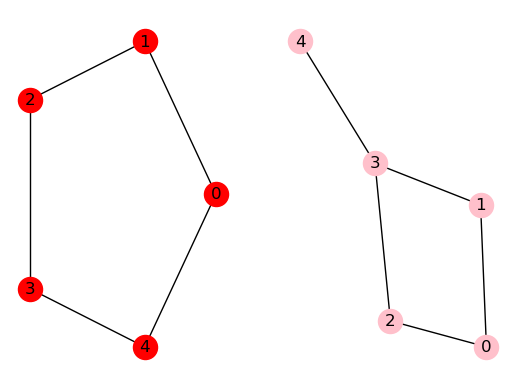

In [272]:
# here is the two graph G5 and G7
fig, (ax1, ax2) = plt.subplots(1, 2)

nx.draw_circular(G5, ax=ax1, with_labels=True, node_color="Red")
nx.draw(G7, ax=ax2, with_labels=True, node_color="Pink")



In [263]:
nx.is_isomorphic(G5, G7)


False

#### What exactly makes a graph isomorphic 

If we are given two simple graphs, G and H. Graphs G and H are isomorphic if there is a structure that preserves a one-to-one correspondence between the vertices and edges.[6]

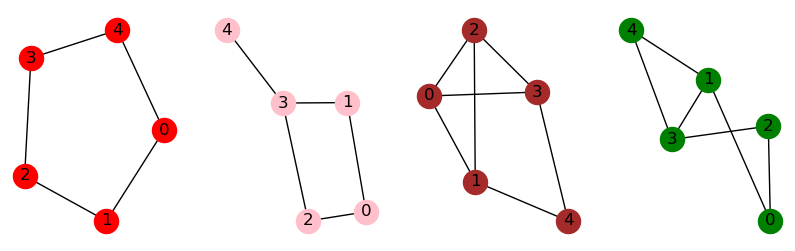

In [275]:

adj_matrix3 = np.array([[0, 1, 1, 1, 0],
                        [1, 0, 1, 0, 1],
                        [1, 1, 0, 1, 0],
                        [1, 0, 1, 0, 1],
                        [0, 1, 0, 1, 0]])

adj_matrix4 = np.array([[0, 1, 1, 0, 0],
                        [1, 0, 0, 1, 1],
                        [1, 0, 0, 1, 0],
                        [0, 1, 1, 0, 1],
                        [0, 1, 0, 1, 0]])


G3 = nx.from_numpy_array(adj_matrix3)
G4 = nx.from_numpy_array(adj_matrix4)

fig, axs = plt.subplots(1, 4, figsize=(10, 3))

# Draw each graph on a subplot
nx.draw(G5, ax=axs[0], with_labels=True, node_color="Red")
nx.draw(G7, ax=axs[1], with_labels=True, node_color="Pink")
nx.draw(G3, ax=axs[2], with_labels=True, node_color="brown")
nx.draw(G4, ax=axs[3], with_labels=True, node_color="green")



All we have to do is ask the following questions:

1. Are the number of vertices in the graphs the same?
2. Are the number of edges in the graphs the same? 
3. Is the degree sequence in the graphs the same? 
4. If the vertices in one graph can form a cycle of length k, can we find the same cycle length in the other graph? 

If we can answer yes to all four of the above questions, then the graphs are isomorphic. In other words, they are the equivalent graphs just in different forms.

they all have 5 vertices but none of these graph are isomorphic 

In [278]:
nx.is_isomorphic(G3, G4)



False

In [279]:
nx.is_isomorphic(G7, G4)


False

### Johnson Graph

 Johnson graphs are a special class of undirected graphs defined from systems of sets. The vertices of the Johnson graph J(n,k) are the k-element subsets of an n-element set; two vertices are adjacent when the intersection of the two vertices (subsets) contains (k-1)-elements [5]


In [108]:
def johnson_graph(n, k):
  
    J = nx.Graph()
    for i in range(n+1):
        for S in combinations(range(n), i):
            if len(S) == k:
                J.add_node(S)
    for S in J.nodes():
        for T in J.nodes():
            if len(set(S).intersection(set(T))) == k-1:
                J.add_edge(S, T)
    return J


This function should work properly for any non-negative integers n and k where k is less than or equal to n.

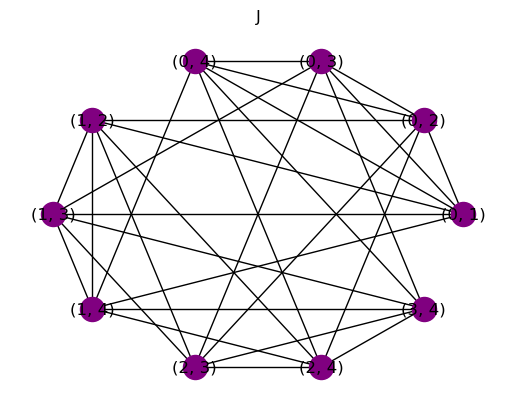

In [145]:
n = 5
k = 2
J = johnson_graph(n, k)
plt.title("J")
nx.draw_circular(J, with_labels=True, node_color="purple")



J(n,k) is isomorphic to J(n,n-k). [5]

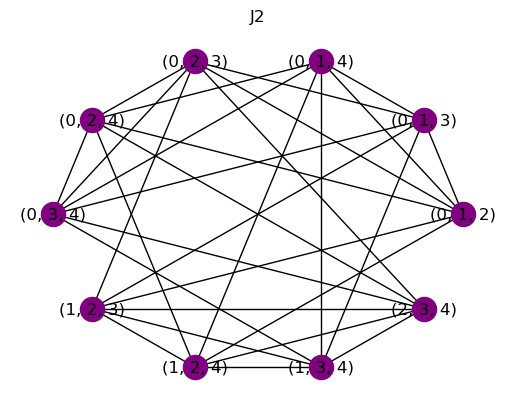

In [146]:
n = 5
k = 2
J2 = johnson_graph(n, n-k)
plt.title("J2")
nx.draw_circular(J2, with_labels=True, node_color="purple")


In [140]:
nx.is_isomorphic(J, J2)


True

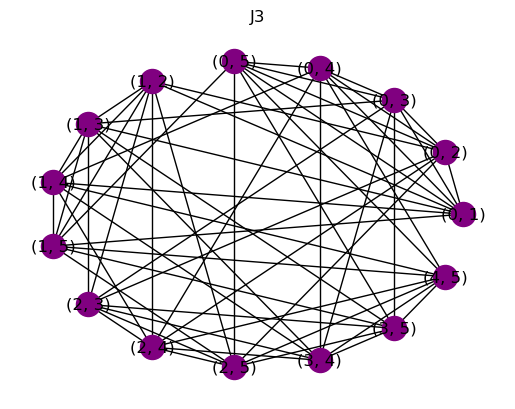

In [167]:
n = 6
k = 2
J3 = johnson_graph(n, k)
plt.title("J3")
nx.draw_circular(J3, with_labels=True, node_color="purple")


As you can see when you change the value of n or k where k is not n-k then the graphs are not isomorphic.

J is not isomorphic to J3.  

In [163]:
nx.is_isomorphic(J, J3)


False

### Graph isomorphism problem
The problem of graph isomorphism is a long-standing problem in computer that gained interest in the 1970s.[4]. It has numerous applications in fields like chemistry and computer vision. It is closely linked to detecting symmetries in graphs and combinatorial structures. 
##### Why do we care?
A graph is ultimately a set of points connected by edges, so any problem regarding efficiency and/or distance travelled can be answered using graph theory, think truck routes, amazon distribution centres, but also in computing (maps and logic) lots of uses for it. 

There has been a lot of interest in using molecular structures to solve the graph isomorphism problem. This is because people often draw molecules differently, even though they are identical. By analysing the molecular structure of a compound, scientists can determine whether it is structurally identical to another compound, which is essentially the same as solving the graph isomorphism problem.

##### molecular graph interest
Is the molecular graphs for cyclohexane and cyclohexene isomorphic? depending who you ask it might or might not be considered isomorphic.[7] This is an interesting topic for the use of graph theory and isomorphism 

![](data/molecule-equality.png)


#### References

- 1 https://en.wikipedia.org/wiki/Graph_isomorphism
- 2 https://en.wikipedia.org/wiki/Graph_isomorphism_problem
- 3 https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.vf2pp.vf2pp_is_isomorphic.html#networkx.algorithms.isomorphism.vf2pp.vf2pp_is_isomorphic
- 4 https://cacm.acm.org/magazines/2020/11/248220-the-graph-isomorphism-problem/abstract#:~:text=The%20first%20application%20of%20algorithmic,testing%20was%20given%20by%20Babai.&text=Subsequently%2C%20Luks26%20used%20a,for%20graphs%20of%20bounded%20degree.
- 5 https://en.wikipedia.org/wiki/Johnson_graph
- 6 https://calcworkshop.com/trees-graphs/isomorphic-graph/#:~:text=Graphs%20G%20and%20H%20are,as%20noted%20by%20Columbia%20University.
